In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]

In [4]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
## 数据SVM分类器构建
svm1 = SVC(C=0.1, kernel='rbf')
svm2 = SVC(C=1, kernel='rbf')
svm3 = SVC(C=10, kernel='rbf')
svm4 = SVC(C=100, kernel='rbf')
svm5 = SVC(C=500, kernel='rbf')
svm6 = SVC(C=100000, kernel='rbf')
#C越大，泛化能力越差，会出现过拟合的问题
#C越小，泛化能力越好，但是容易出现欠拟合的问题
## 模型训练
t0=time.time()
svm1.fit(x_train, y_train)
t1=time.time()
svm2.fit(x_train, y_train)
t2=time.time()
svm3.fit(x_train, y_train)
t3=time.time()
svm4.fit(x_train, y_train)
t4=time.time()
svm5.fit(x_train, y_train)
t5=time.time()
svm6.fit(x_train, y_train)
t6=time.time()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

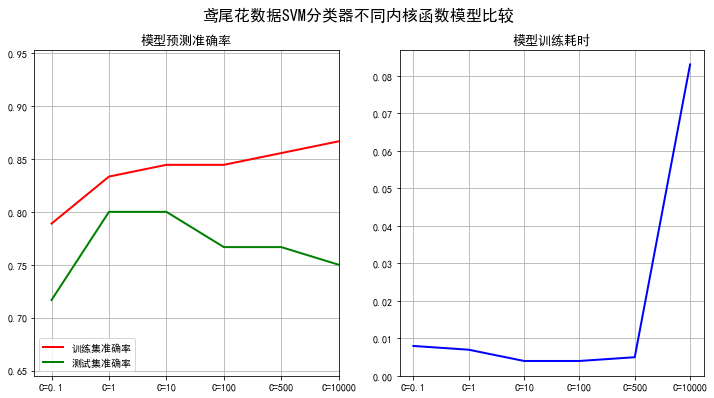

In [6]:
### 效果评估
svm1_score1 = accuracy_score(y_train, svm1.predict(x_train))
svm1_score2 = accuracy_score(y_test, svm1.predict(x_test))

svm2_score1 = accuracy_score(y_train, svm2.predict(x_train))
svm2_score2 = accuracy_score(y_test, svm2.predict(x_test))

svm3_score1 = accuracy_score(y_train, svm3.predict(x_train))
svm3_score2 = accuracy_score(y_test, svm3.predict(x_test))

svm4_score1 = accuracy_score(y_train, svm4.predict(x_train))
svm4_score2 = accuracy_score(y_test, svm4.predict(x_test))

svm5_score1 = accuracy_score(y_train, svm5.predict(x_train))
svm5_score2 = accuracy_score(y_test, svm5.predict(x_test))

svm6_score1 = accuracy_score(y_train, svm6.predict(x_train))
svm6_score2 = accuracy_score(y_test, svm6.predict(x_test))

## 画图
x_tmp = [0,1,2,3, 4, 5]
t_score = [t1 - t0, t2-t1, t3-t2, t4-t3, t5-t4, t6-t5]
y_score1 = [svm1_score1, svm2_score1, svm3_score1, svm4_score1, svm5_score1, svm6_score1]
y_score2 = [svm1_score2, svm2_score2, svm3_score2, svm4_score2, svm5_score2, svm6_score2]

plt.figure(facecolor='w', figsize=(12,6))


plt.subplot(121)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')
plt.xlim(-0.3, 3.3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower left')
plt.title(u'模型预测准确率', fontsize=13)
plt.xticks(x_tmp, [u'C=0.1', u'C=1', u'C=10', u'C=100', u'C=500', u'C=10000'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'模型训练时间')
plt.title(u'模型训练耗时', fontsize=13)
plt.xticks(x_tmp, [u'C=0.1', u'C=1', u'C=10', u'C=100', u'C=500', u'C=10000'], rotation=0)
plt.grid(b=True)

plt.suptitle(u'鸢尾花数据SVM分类器不同内核函数模型比较', fontsize=16)

plt.show()

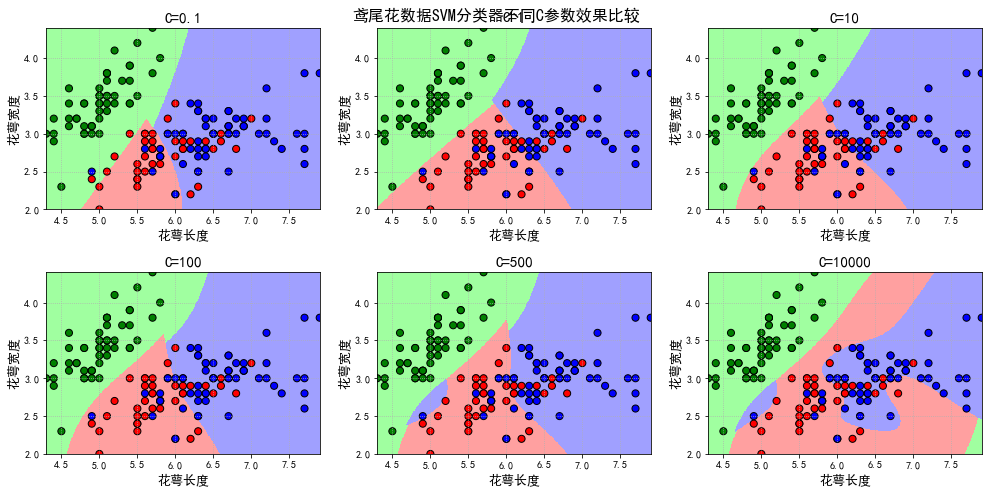

In [7]:
### 预测结果画图
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm1_grid_hat = svm1.predict(grid_show)
svm1_grid_hat = svm1_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm2_grid_hat = svm2.predict(grid_show)
svm2_grid_hat = svm2_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm3_grid_hat = svm3.predict(grid_show)
svm3_grid_hat = svm3_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm4_grid_hat = svm4.predict(grid_show)
svm4_grid_hat = svm4_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm5_grid_hat = svm5.predict(grid_show)
svm5_grid_hat = svm5_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm6_grid_hat = svm6.predict(grid_show)
svm6_grid_hat = svm6_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(231)
## 区域图
plt.pcolormesh(x1, x2, svm1_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=0.1', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(232)
## 区域图
plt.pcolormesh(x1, x2, svm2_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=1', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(233)
## 区域图
plt.pcolormesh(x1, x2, svm3_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=10', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(234)
## 区域图
plt.pcolormesh(x1, x2, svm4_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=100', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(235)
## 区域图
plt.pcolormesh(x1, x2, svm5_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=500', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(236)
## 区域图
plt.pcolormesh(x1, x2, svm6_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=10000', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)


plt.suptitle(u'鸢尾花数据SVM分类器不同C参数效果比较', fontsize=16)
plt.show()